In [38]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
cases = pd.read_csv("cases.csv")
vaccines = pd.read_csv("vacinas.csv",sep=";")
death = pd.read_csv("death.csv")

death = death.set_index("Name")
cases = cases.set_index("Name")
vaccines = vaccines.set_index("Name")
tabela = pd.concat([vaccines,cases,death],axis=1)
tabela = tabela.dropna()
tabela["death"] = pd.to_numeric(tabela["death"])
tabela["cases"] = pd.to_numeric(tabela["cases"])

index = tabela.index



In [40]:
tabela.head()

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death
Name,,,,
Afghanistan,1.08,0.85,2380.39,113.44
Africa,1.65,1.52,2874.87,76.16
Albania,18.40,4.93,26023.92,444.14
Algeria,1.62,6.04,1608.86,33.58
Andorra,45.99,19.62,85696.93,568.81


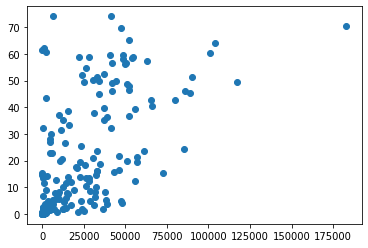

In [41]:
plt.scatter(tabela["cases"], tabela["fully_vaccinated_percentual"])

In [42]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [43]:
y_predict = km.fit_predict(tabela[['cases', 'fully_vaccinated_percentual']])
y_predict

array([0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [44]:
tabela["cluster"] = y_predict
tabela.head()

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death,cluster
Name,,,,,
Afghanistan,1.08,0.85,2380.39,113.44,0
Africa,1.65,1.52,2874.87,76.16,0
Albania,18.40,4.93,26023.92,444.14,2
Algeria,1.62,6.04,1608.86,33.58,0
Andorra,45.99,19.62,85696.93,568.81,1


No handles with labels found to put in legend.


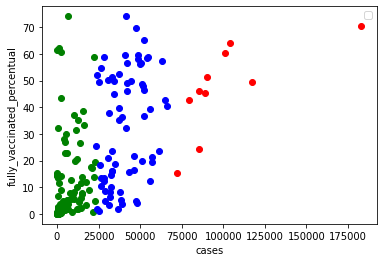

In [45]:
cluster0  = tabela[tabela.cluster == 0]
cluster1  = tabela[tabela.cluster == 1]
cluster2  = tabela[tabela.cluster == 2]

plt.scatter(cluster0.cases,cluster0.fully_vaccinated_percentual, color='green')
plt.scatter(cluster1.cases,cluster1.fully_vaccinated_percentual, color='red')
plt.scatter(cluster2.cases,cluster2.fully_vaccinated_percentual, color='blue')

plt.xlabel('cases')
plt.ylabel('fully_vaccinated_percentual')
plt.legend()

In [46]:
scaler = MinMaxScaler()
atributos = tabela.columns
np_df = scaler.fit_transform(tabela)
df = pd.DataFrame(np_df,columns=atributos)
df

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death,cluster
0,0.014575,0.020137,0.012984,0.036640,0.0
1,0.022267,0.036010,0.015686,0.024599,0.0
2,0.248313,0.116797,0.142176,0.143453,1.0
3,0.021862,0.143094,0.008769,0.010846,0.0
4,0.620648,0.464819,0.468239,0.183720,0.5
...,...,...,...,...,...
181,0.008502,0.119877,0.008248,0.004183,0.0
182,0.157760,0.393746,0.079300,0.095964,0.0
183,0.000540,0.022033,0.000867,0.008104,0.0
184,0.010661,0.017058,0.050543,0.051229,0.0


In [47]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(df)
y_predict

df["cluster"] = y_predict
df.head()

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death,cluster
0,0.014575,0.020137,0.012984,0.036640,0
1,0.022267,0.036010,0.015686,0.024599,0
2,0.248313,0.116797,0.142176,0.143453,3
3,0.021862,0.143094,0.008769,0.010846,0
4,0.620648,0.464819,0.468239,0.183720,1


No handles with labels found to put in legend.


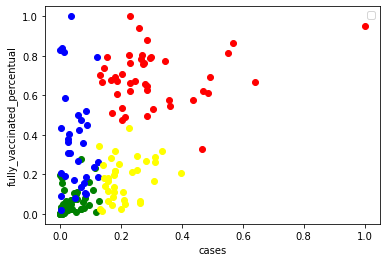

In [48]:
cluster0  = df[df.cluster == 0]
cluster1  = df[df.cluster == 1]
cluster2  = df[df.cluster == 2]
cluster3 = df[df.cluster==3]
plt.scatter(cluster0.cases,cluster0.fully_vaccinated_percentual, color='green')
plt.scatter(cluster1.cases,cluster1.fully_vaccinated_percentual, color='red')
plt.scatter(cluster2.cases,cluster2.fully_vaccinated_percentual, color='blue')
plt.scatter(cluster3.cases,cluster3.fully_vaccinated_percentual, color='yellow')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = '*')

plt.xlabel('cases')
plt.ylabel('fully_vaccinated_percentual')
plt.legend()

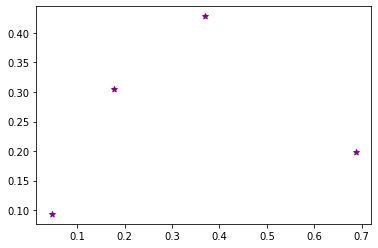

In [49]:

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = '*')

In [50]:
km.cluster_centers_

array([[4.59911634e-02, 9.36705903e-02, 2.69097060e-02, 3.27461535e-02,
        5.55111512e-16],
       [6.88210036e-01, 1.97712735e-01, 3.06829329e-01, 2.47516353e-01,
        8.97727273e-01],
       [3.69562017e-01, 4.28068891e-01, 5.16537130e-02, 6.36606662e-02,
        2.77555756e-16],
       [1.77474134e-01, 3.05792466e-01, 2.08060039e-01, 2.82581628e-01,
        9.86111111e-01]])

In [51]:
df = df.set_index(index)
df.head()

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death,cluster
Name,,,,,
Afghanistan,0.014575,0.020137,0.012984,0.036640,0
Africa,0.022267,0.036010,0.015686,0.024599,0
Albania,0.248313,0.116797,0.142176,0.143453,3
Algeria,0.021862,0.143094,0.008769,0.010846,0
Andorra,0.620648,0.464819,0.468239,0.183720,1


In [52]:
x = df.loc[df.cluster ==0]
x

,fully_vaccinated_percentual,partly_vaccinated_percentual,cases,death,cluster
Name,,,,,
Afghanistan,0.014575,0.020137,0.012984,0.036640,0
Africa,0.022267,0.036010,0.015686,0.024599,0
Algeria,0.021862,0.143094,0.008769,0.010846,0
Angola,0.028205,0.018242,0.004039,0.005769,0
Azerbaijan,0.276248,0.182658,0.066867,0.075257,0
...,...,...,...,...,...
Venezuela,0.051687,0.148543,0.036565,0.028840,0
Vietnam,0.008502,0.119877,0.008248,0.004183,0
Yemen,0.000540,0.022033,0.000867,0.008104,0


In [53]:
y_predict

array([0, 0, 3, 0, 1, 0, 2, 3, 3, 2, 2, 1, 0, 0, 1, 0, 2, 3, 1, 2, 0, 2,
       3, 3, 3, 3, 2, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 0, 3, 1, 3, 1, 1, 0,
       1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 3, 2, 1, 0, 0, 3, 1, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 3, 3, 1, 1, 1, 0, 2, 3, 2, 0, 3,
       3, 0, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 2, 2, 3, 1, 1,
       1, 2, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 3, 0, 3, 0, 3, 3, 0,
       1, 1, 1, 3, 0, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 3, 2,
       0, 1, 2, 0, 3, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 3, 3, 0, 3, 1, 1, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)